In [29]:
# Biblioteca para manipular valores numéricos 
import numpy as np

# Bibliotecas de importação/manipulação de dados
import pandas as pd  
import seaborn as sns 

# Biblioteca de visualização (gráficos) - Exploração/Preparação de Dados
import matplotlib.pyplot as plt 

# OPCAO 1 - IMPORTANDO BASE DIRETO DA BILIOTECA SKLEARN
# Bibliotecas com os modelos para mineração de dados visto em aula
from sklearn.datasets import load_boston 
boston_dataset = load_boston() # Já carrega a base de dados com características e preços de casas conhecidas (amostras de treinamento) em Boston

print(boston_dataset.keys()) #Exibindo características da base

['filename', 'data', 'target', 'DESCR', 'feature_names']


In [32]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) # Criando o DataFrame do pandas

# OPCAO 2 - BAIXAR O CSV DAS CASAS DE BOSTOS E IMPORTAR O CSV COMO UM DATAFRAME DO PANDAS
# boston = pd.read_csv('boston.csv')

# PROSSEGUINDO COM OPCAO 1
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print(boston_dataset.DESCR) # Exibindo descricção da base

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
boston['MEDV']=boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
print(boston.shape)
print(boston.dtypes)

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [9]:
print(boston.isnull().mean()*100,2)

(CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64, 2)


Text(0.5,0,'MEDV')

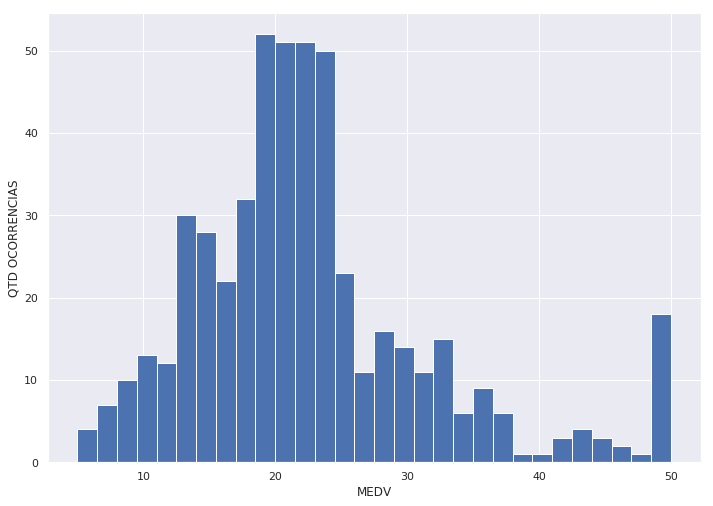

In [37]:
# Caso quisessemos plotar o histograma da MEDV usando matplotlib
n_bins = 30

var1 = boston['MEDV']
#print(var1)

plt.hist(var1, bins=n_bins)
plt.ylabel('QTD OCORRENCIAS')
plt.xlabel('MEDV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cc7a12490>]],
      dtype=object)

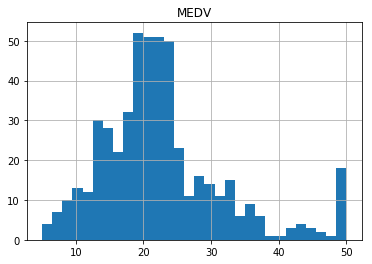

In [13]:
# Usando plot de histograma do próprio pandas
boston.hist(column='MEDV',bins=30)

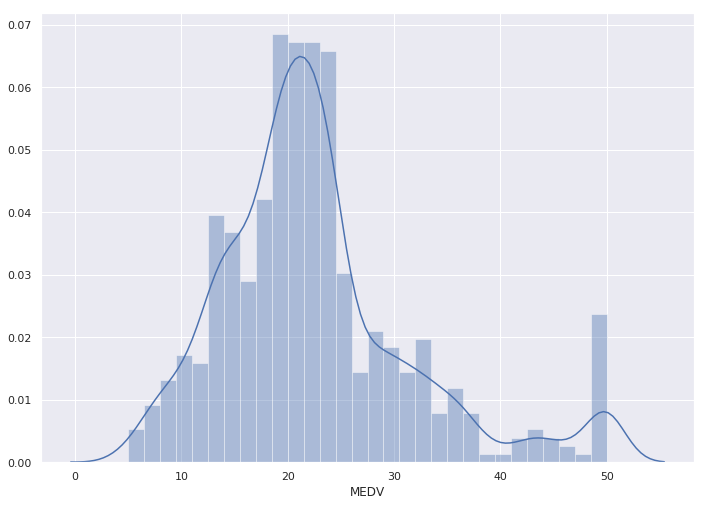

In [14]:
# Plotando histograma dos valores usando o seaborn (distribuição Normal/Gaussiana com alguns outliers)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

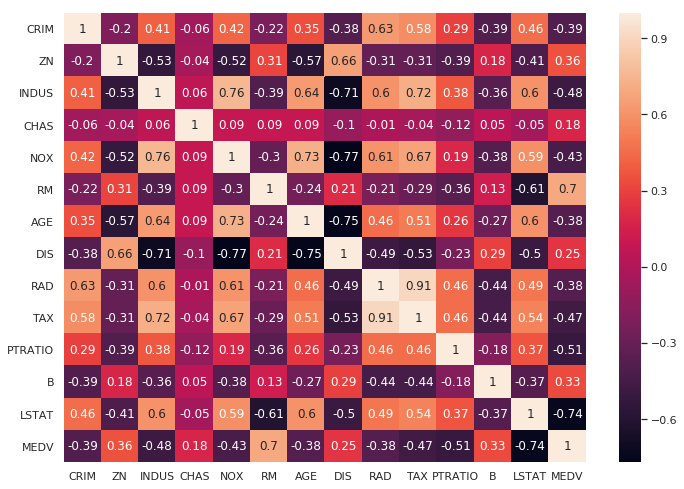

In [16]:
# Identificando correlação entre variáveis (NÃO É A MATRIZ DE CONFUSÃO!)
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

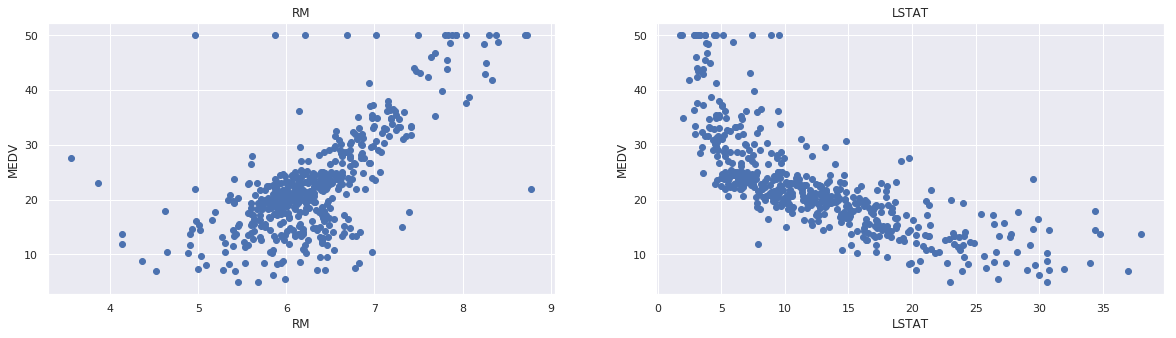

In [45]:
#Explorando visualmente variáveis
plt.figure(figsize=(20, 5))

#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000
#        - PTRATIO  pupil-teacher ratio by town
#        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#        - LSTAT    % lower status of the population
#        - MEDV     Median value of owner-occupied homes in $1000's

features = ['RM','LSTAT']
#print(features)
target = boston['MEDV']
#print(target)

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [51]:
# Separando amostras conhecidas em  conjunto de treinamento e validação

#X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
X = boston[['LSTAT','RM']]
Y = boston[['MEDV']]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [52]:
# Treinando modelo de Regressão Linear

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.63712933507
R2 score is 0.630074514933


The model performance for testing set
--------------------------------------
RMSE is 5.1374007847
R2 score is 0.662899697519


In [53]:
# Eliminando outliers

dfAux = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'],boston['MEDV']], columns = ['LSTAT','RM','MEDV'])
#print(dfAux)

isNotOutlier =  ((dfAux['RM']>8.0) | (dfAux['MEDV']<40.0)) & ((dfAux['LSTAT']<5.0) | (dfAux['MEDV']<40.0))

#print(isNotOutlier)
dfAuxFiltered = dfAux[isNotOutlier]
print(dfAuxFiltered.shape)

(482, 3)


In [54]:
# Treinando modelo sem outliers
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X=dfAuxFiltered[['LSTAT','RM']]
Y=dfAuxFiltered[['MEDV']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(385, 2)
(97, 2)
(385, 1)
(97, 1)


In [55]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.39993595697
R2 score is 0.647969892164


The model performance for testing set
--------------------------------------
RMSE is 4.38120935595
R2 score is 0.657850063892


In [24]:
#-----------------------------------
# PROCESSAMENTO PARALELO - PYSPARK
#----------------------------------

# Usando a biblioteca ML

from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression


temp_df = spark.createDataFrame(dfAuxFiltered)
temp_df.show()

+-----+-----+----+
|LSTAT|   RM|MEDV|
+-----+-----+----+
| 4.98|6.575|24.0|
| 9.14|6.421|21.6|
| 4.03|7.185|34.7|
| 2.94|6.998|33.4|
| 5.33|7.147|36.2|
| 5.21| 6.43|28.7|
|12.43|6.012|22.9|
|19.15|6.172|27.1|
|29.93|5.631|16.5|
| 17.1|6.004|18.9|
|20.45|6.377|15.0|
|13.27|6.009|18.9|
|15.71|5.889|21.7|
| 8.26|5.949|20.4|
|10.26|6.096|18.2|
| 8.47|5.834|19.9|
| 6.58|5.935|23.1|
|14.67| 5.99|17.5|
|11.69|5.456|20.2|
|11.28|5.727|18.2|
+-----+-----+----+
only showing top 20 rows



In [25]:
trainingData=temp_df.rdd.map(lambda x:(Vectors.dense(x[0:-1]), x[-1])).toDF(["features", "label"])
trainingData.show()

+-------------+-----+
|     features|label|
+-------------+-----+
| [4.98,6.575]| 24.0|
| [9.14,6.421]| 21.6|
| [4.03,7.185]| 34.7|
| [2.94,6.998]| 33.4|
| [5.33,7.147]| 36.2|
|  [5.21,6.43]| 28.7|
|[12.43,6.012]| 22.9|
|[19.15,6.172]| 27.1|
|[29.93,5.631]| 16.5|
| [17.1,6.004]| 18.9|
|[20.45,6.377]| 15.0|
|[13.27,6.009]| 18.9|
|[15.71,5.889]| 21.7|
| [8.26,5.949]| 20.4|
|[10.26,6.096]| 18.2|
| [8.47,5.834]| 19.9|
| [6.58,5.935]| 23.1|
| [14.67,5.99]| 17.5|
|[11.69,5.456]| 20.2|
|[11.28,5.727]| 18.2|
+-------------+-----+
only showing top 20 rows



In [26]:
lr = LinearRegression(maxIter=10)
model=lr.fit(trainingData)

In [27]:
test_df = spark.createDataFrame([Row(LSTAT=4.9, RM=6.5, XXX=0)])

testingData=test_df.rdd.map(lambda x:(Vectors.dense(x[0:-1]), x[-1])).toDF(["features", "label"])
testingData.show()

+---------+-----+
| features|label|
+---------+-----+
|[4.9,6.5]|    0|
+---------+-----+



In [28]:
prediction=model.transform(testingData)
prediction.show()

+---------+-----+-----------------+
| features|label|       prediction|
+---------+-----+-----------------+
|[4.9,6.5]|    0|27.19297505528418|
+---------+-----+-----------------+

